<a href="https://colab.research.google.com/github/natoo77/GymMemebersDataset---EDA-Calorie-prediction/blob/main/Gym_Members_Exercise_Dataset_EDA_%2B_Calorie_prediction_regression_%2B_Experience_level_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
import kagglehub

# Download latest data version from kaggle
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [429]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv')

In [430]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


**Columns description:**
- `Age`  The age of the individual (in years)
- `Gender` The individual's gender (Male, Female)
- `Weight(kg)` The body weight of the individual in kilograms
- `Height(m)`	The height of the individual in meters
- `Max_BPM`	The maximum heart rate (beats per minute) recorded during the workout
- `Avg_BPM`	The average heart rate (beats per minute) during the workout session
- `Resting_BPM`	The individual’s resting heart rate (beats per minute) prior to the workout.
- `Session_Duration(hours)`	The duration of the workout session, measured in hours.
- `Calories_Burned`	The total calories burned during the workout session
- `Workout_Type`	The type of workout performed (e.g., Cardio, Strength, Yoga)
- `Fat_Percentage`	The individual’s body fat percentage.
- `Water_Intake(liters)` The amount of water consumed during or around the workout, in liters.
- `Workout_Frequency (days/week)`	How often the individual works out, measured in days per week.
- `Experience_Level`	The individual’s fitness level or experience (e.g., Beginner, Intermediate, Advanced).
- `BMI` Body Mass Index, calculated as weight (kg) divided by the square of height (m).

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [432]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [433]:
data.describe(include='object').T

,count,unique,top,freq
Gender,973,2,Male,511
Workout_Type,973,4,Strength,258


In [434]:
data.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


# **EDA** - Exploratory Data Analysis

## Analysis of single features

<Axes: xlabel='Age', ylabel='Count'>

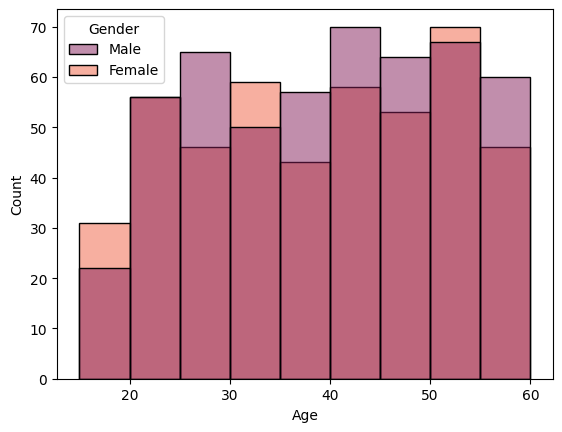

In [435]:
# @title Age histogram

sns.histplot(data=data, x="Age", hue= 'Gender', binwidth=5, binrange=[15,60], palette= 'rocket')


<Axes: xlabel='BMI', ylabel='Count'>

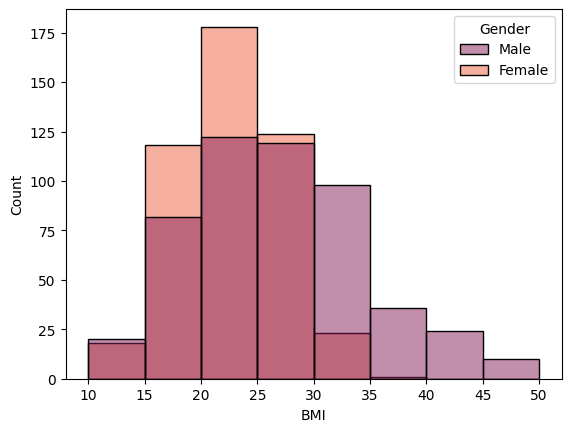

In [436]:
# @title BMI histogram

sns.histplot(data=data, x="BMI", hue= 'Gender', binwidth=5, binrange=[10,50], palette= 'rocket')


<Axes: xlabel='Session_Duration (hours)', ylabel='Count'>

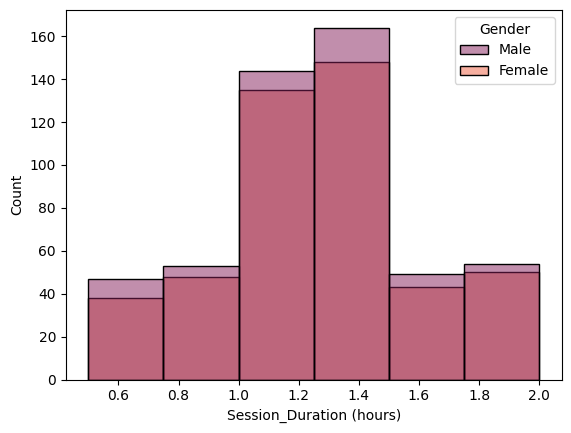

In [437]:
# @title Session duration
sns.histplot(data=data, x="Session_Duration (hours)", binwidth=0.25, binrange=[0.5,2], hue= 'Gender', palette= 'rocket')
#30, 45, 60, 75, 90, 105,120 - inervals for workout

<Axes: xlabel='Calories_Burned', ylabel='Count'>

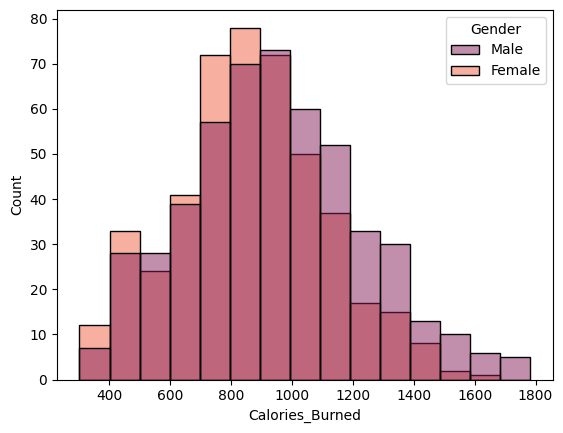

In [438]:
# @title Calories burnt
sns.histplot(data=data, x="Calories_Burned", hue= 'Gender', bins=15, palette= 'rocket')
#30, 45, 60, 75, 90, 105,120 - inervals for workout

<Axes: xlabel='Gender', ylabel='count'>

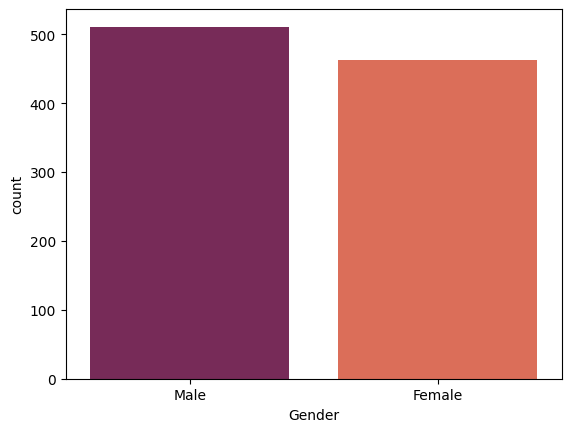

In [439]:
# @title Gender count
sns.countplot(data=data, x='Gender', palette= 'rocket', hue_order=['Female','Male'])


<Axes: xlabel='Workout_Frequency (days/week)', ylabel='count'>

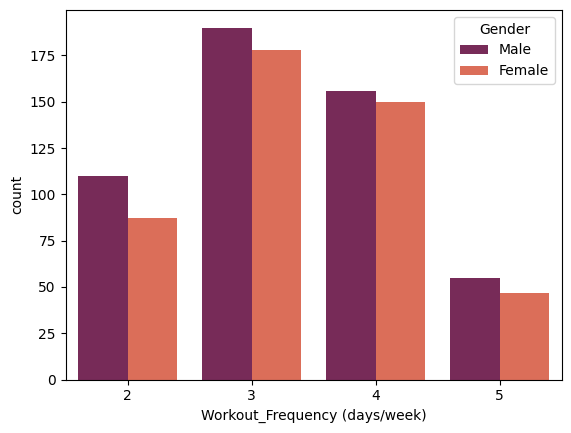

In [440]:
# @title Workout frequency

sns.countplot(x='Workout_Frequency (days/week)', hue='Gender', data=data, palette= 'rocket')

<Axes: xlabel='Workout_Type', ylabel='count'>

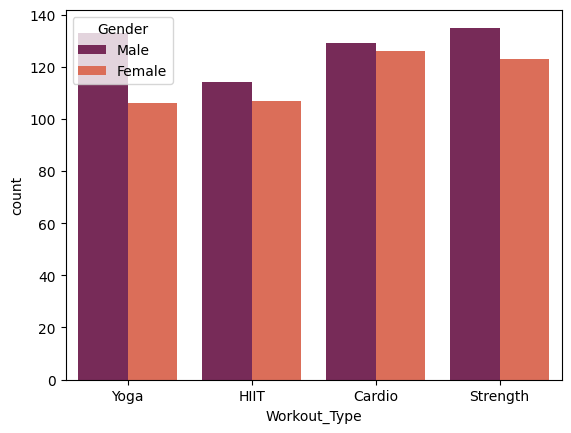

In [441]:
# @title Workout types

sns.countplot(x='Workout_Type', data=data, hue='Gender', palette= 'rocket')

<Axes: xlabel='Experience_Level', ylabel='count'>

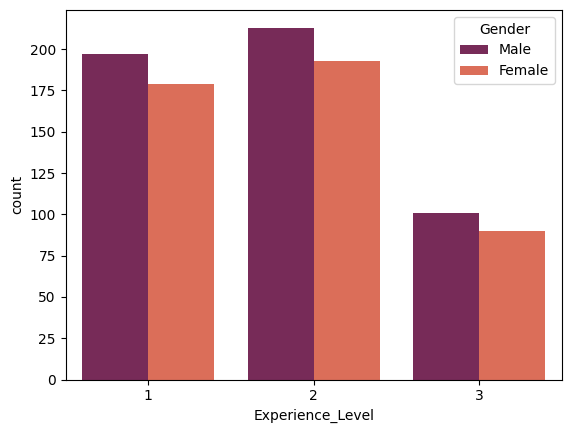

In [442]:
# @title Experience level

sns.countplot(x='Experience_Level', data=data, hue='Gender', palette= 'rocket')

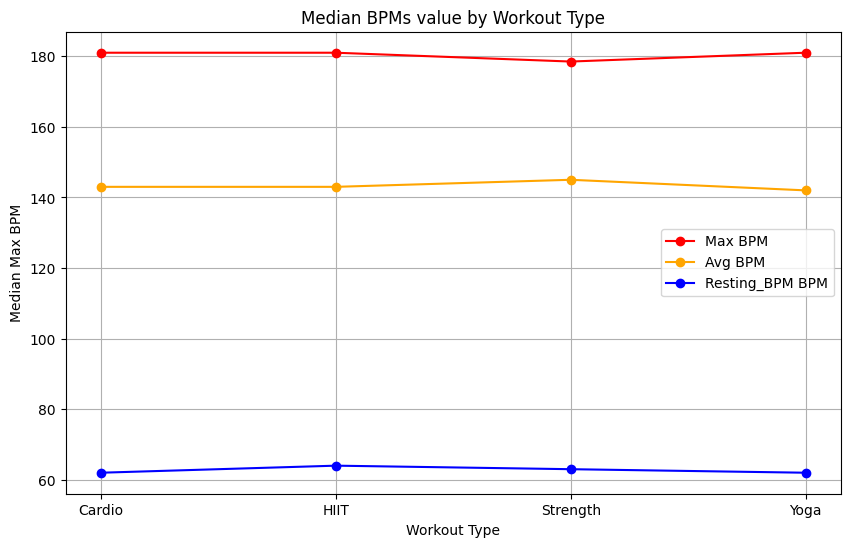

In [443]:
# Group by Workout_Type and calculate the median Max_BPM
grouped_data1 = data.groupby('Workout_Type')['Max_BPM'].median().reset_index()
grouped_data2 = data.groupby('Workout_Type')['Avg_BPM'].median().reset_index()
grouped_data3 = data.groupby('Workout_Type')['Resting_BPM'].median().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(grouped_data1['Workout_Type'], grouped_data1['Max_BPM'], label='Max BPM', color='red', marker='o')
plt.plot(grouped_data2['Workout_Type'], grouped_data2['Avg_BPM'], label='Avg BPM', color='orange', marker='o')
plt.plot(grouped_data3['Workout_Type'], grouped_data3['Resting_BPM'], label='Resting_BPM BPM', color='blue', marker='o')
plt.title("Median BPMs value by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Median Max BPM")
plt.grid()
plt.legend()
plt.show()

## Analysis of combined features

<Axes: xlabel='Workout_Frequency (days/week)', ylabel='Session_Duration (hours)'>

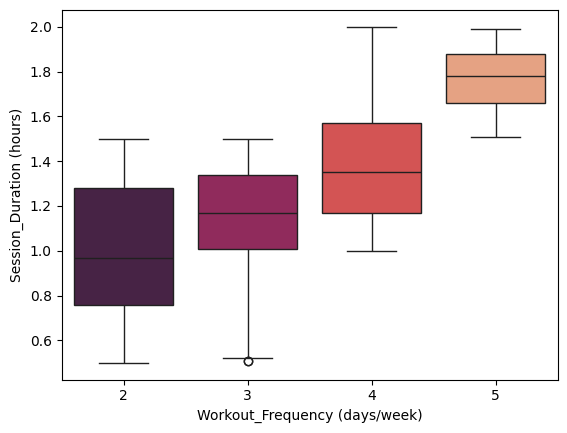

In [444]:
# @title Workout Frequency Vs. Session Duration

sns.boxplot(x="Workout_Frequency (days/week)", y="Session_Duration (hours)", data=data, palette= 'rocket')

<Axes: xlabel='Workout_Frequency (days/week)', ylabel='Calories_Burned'>

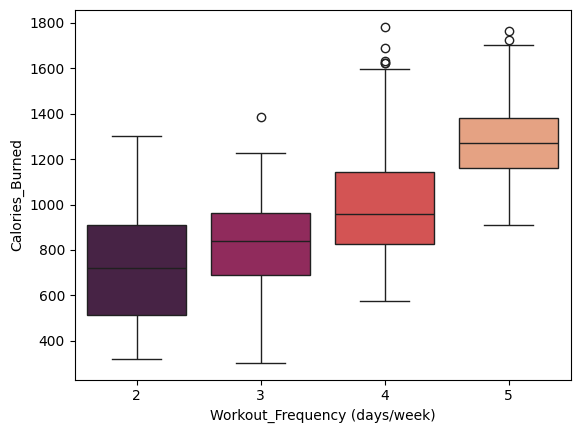

In [445]:
# @title Workout Frequency Vs. Calories Burnt

sns.boxplot(x="Workout_Frequency (days/week)", y="Calories_Burned", data=data, palette= 'rocket')

<Axes: xlabel='Workout_Frequency (days/week)', ylabel='BMI'>

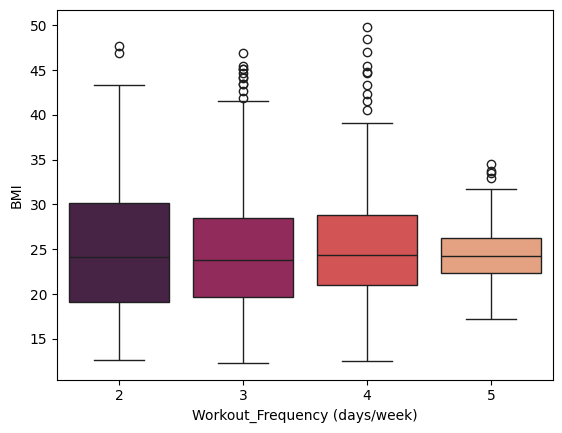

In [446]:
# @title Workout Frequency Vs. BMI
sns.boxplot(x='Workout_Frequency (days/week)',y='BMI',data=data, palette= 'rocket')

<Axes: xlabel='Experience_Level', ylabel='BMI'>

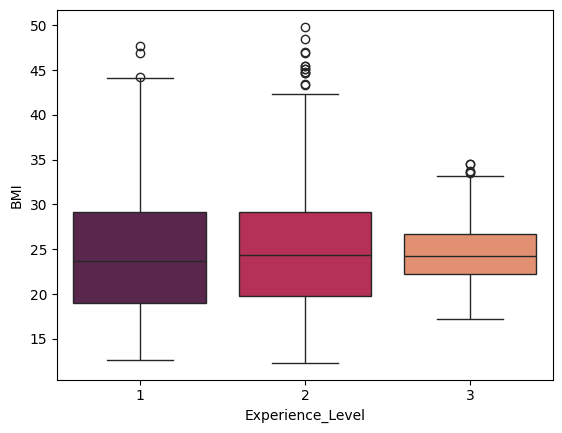

In [447]:
# @title Experience Level Vs. BMI
sns.boxplot(x='Experience_Level',y='BMI',data=data, palette= 'rocket')

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

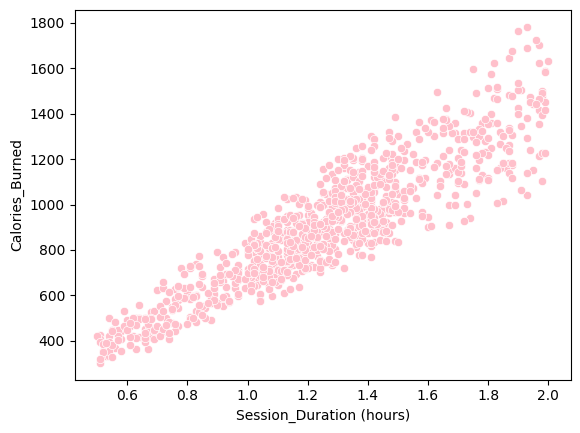

In [448]:
# @title Session_Duration (hours) Vs. Calories Burnt
sns.scatterplot(x='Session_Duration (hours)',y='Calories_Burned',data=data, color= 'pink')

<Axes: xlabel='Session_Duration (hours)', ylabel='Age'>

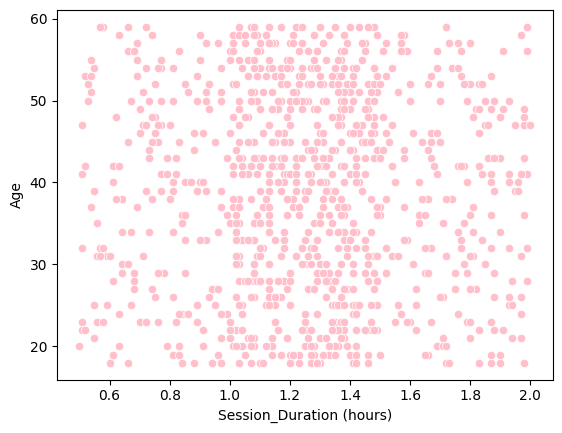

In [449]:
# @title Session_Duration (hours) Vs. Age
sns.scatterplot(x='Session_Duration (hours)',y='Age',data=data, color= 'pink')

# MODEL BUILDING - Calories prediction


This project addresses a **Regression Machine Learning** problem, aiming to build a predictive model for estimating calorie burn. The model leverages input features such as the type, duration, and intensity of physical activity, along with individual characteristics like age, weight, and gender. The objective is to accurately predict the calories burned during specific activities. This model offers valuable insights for individuals, fitness enthusiasts, and healthcare professionals, helping them optimize calorie management and plan physical activities more effectively.

In [450]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [451]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

We have 2 categorical features : ['Gender', 'Workout_Type']


Although experience level is 1-3 is categorical also

<Axes: >

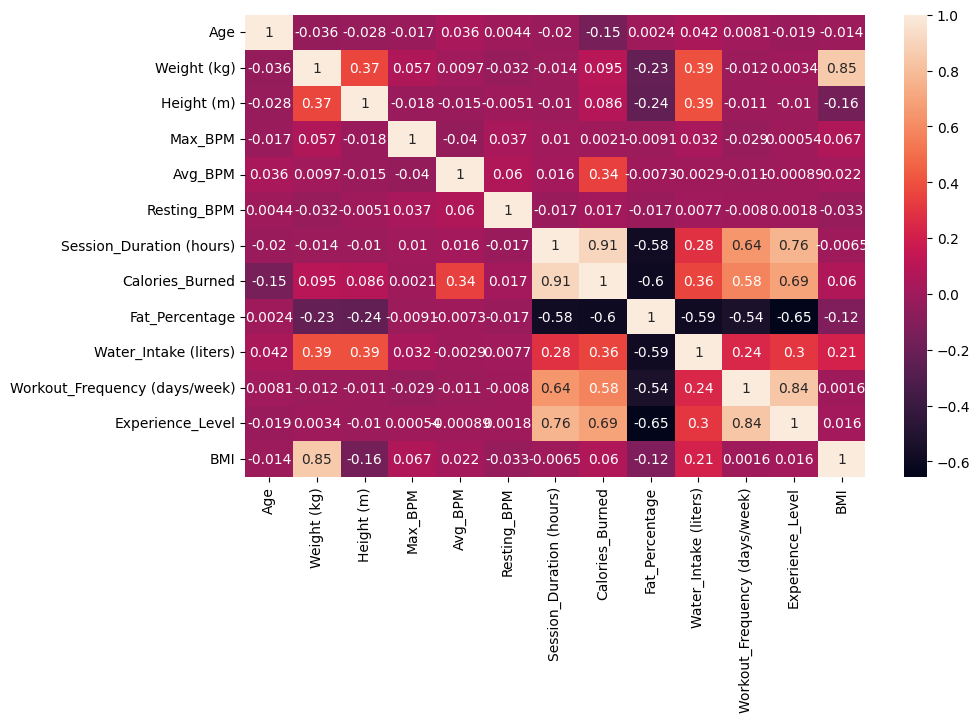

In [452]:
# @title Heatmap of features

plt.figure(figsize=(10,6))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation,
           annot=True,
           cbar=True)

In [453]:
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

In [454]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [455]:
# separating the data and labels
X = data.drop(columns = ['Calories_Burned'], axis=1) # Feature matrix
y = data['Calories_Burned'] # Target variable

In [456]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=45)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(973, 14) (681, 14) (292, 14)
(973,) (681,) (292,)


In [458]:
# @title LINEAR REGRESSION
linreg = LinearRegression().fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)


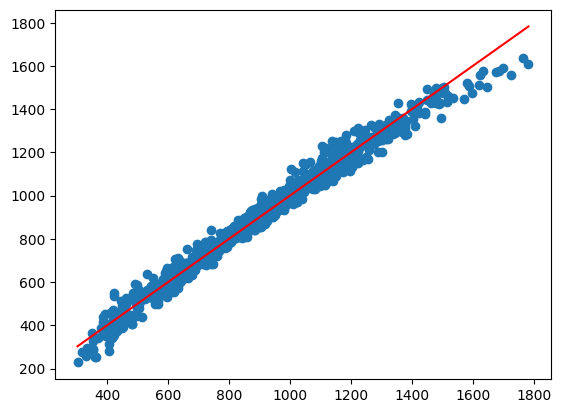

In [459]:

Ylin = np.linspace(data['Calories_Burned'].min(),data['Calories_Burned'].max(),100)
plt.scatter(data['Calories_Burned'],linreg.predict(X_scaled))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()

Feature 0: Age, Score: -41.98187362162838
Feature 1: Gender, Score: 41.69373181850764
Feature 2: Weight (kg), Score: -24.75912071379947
Feature 3: Height (m), Score: 14.0755455050083
Feature 4: Max_BPM, Score: 1.7296511455455437
Feature 5: Avg_BPM, Score: 87.86473812795407
Feature 6: Resting_BPM, Score: 3.637812998268654
Feature 7: Session_Duration (hours), Score: 243.17072820343927
Feature 8: Workout_Type, Score: -2.4075940679433625
Feature 9: Fat_Percentage, Score: -4.138188408245913
Feature 10: Water_Intake (liters), Score: -2.328169433750613
Feature 11: Workout_Frequency (days/week), Score: -0.2686356714412508
Feature 12: Experience_Level, Score: 1.0340713529964631
Feature 13: BMI, Score: 25.598672626295727


<Axes: >

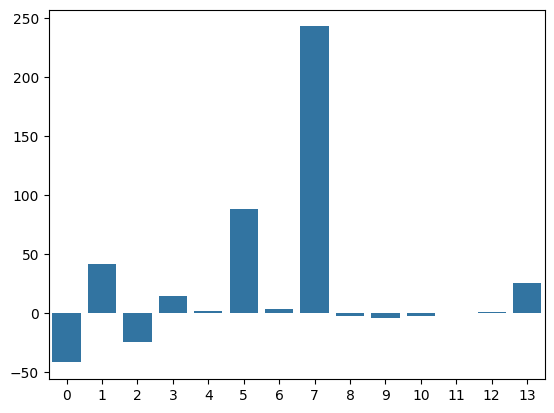

In [460]:
importance = linreg.coef_
importance

# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature {i}: {X.columns[i]}, Score: {v}')
# plot feature importance
sns.barplot(importance)


In [461]:
# @title RIDGE REGRESSION
ridge = Ridge().fit(X_train, y_train)
y_pred2 = ridge.predict(X_test)

mae(y_test, y_pred2)

31.169785675460083

In [462]:
# list of alpha to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0]}

In [463]:
ridge = Ridge()
# Defining GridSearchCV
grid_cv_model_ridge = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error', # Other metrics: r2, neg_mean_squared_error, neg_root_mean_squared_error'
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model_ridge.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [464]:
# Saving GridSearchCV results into a dataframe

grid_cv_model_ridge.best_params_, -grid_cv_model_ridge.best_score_

({'alpha': 1.0}, 30.213242279900896)

In [465]:
# @title LASSO REGRESSION
lasso = Lasso().fit(X_train, y_train)
y_pred3 = lasso.predict(X_test)

mae(y_test, y_pred3)

30.745549906099725

In [466]:
lasso = Lasso()
# Defining GridSearchCV
grid_cv_model_lasso = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model_lasso.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [467]:
# Saving GridSearchCV results into a dataframe

grid_cv_model_lasso.best_params_, -grid_cv_model_lasso.best_score_

({'alpha': 1.0}, 29.99171836773588)

In [468]:
# list of alpha to tune
params_elasticnet = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0],
          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [469]:
# @title ELASTIC NET REGRESSION
elasticnet = ElasticNet().fit(X_train, y_train)
y_pred4 = elasticnet.predict(X_test)


In [470]:
# elasticnet = ElasticNet()
# Defining GridSearchCV
grid_cv_model_elasticnet = GridSearchCV(estimator=elasticnet,
                       param_grid=params_elasticnet,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model_elasticnet.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [471]:
# Saving GridSearchCV results into a dataframe

grid_cv_model_elasticnet.best_params_, grid_cv_model_elasticnet.best_score_

({'alpha': 0.01, 'l1_ratio': 0.7}, -30.21277248661746)

### Models comparison

In [472]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=grid_cv_model_ridge.best_params_['alpha']),
    "Lasso Regression": Lasso(alpha=grid_cv_model_lasso.best_params_['alpha']),
    "ElasticNet": ElasticNet(alpha=grid_cv_model_elasticnet.best_params_['alpha'], l1_ratio=grid_cv_model_elasticnet.best_params_['l1_ratio']),

}

# Dictionary to store MAE results
mae_results = {}

# Loop through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate MAE
    mae_result = mae(y_test, y_pred)

    # Store the result
    mae_results[model_name] = mae_result


In [473]:
# Combine MAE and RMSE results into a DataFrame
results_models = pd.DataFrame({
    "MAE": mae_results.values(),
    # "RMSE": rmse_results.values()
}, index=mae_results.keys())

results_models

,MAE
Linear Regression,31.177037
Ridge Regression,31.169786
Lasso Regression,30.745550
ElasticNet,31.195987


*The results indicate that the four models—Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet—perform similarly in calorie prediction, with minor differences in MAE. Lasso Regression achieves the lowest MAE (30.75), suggesting it slightly outperforms the others, possibly due to its ability to zero out irrelevant features and focus on the most predictive ones. The close performance of Ridge and Linear Regression indicates that regularization adds minimal value, suggesting the data may not be prone to overfitting. ElasticNet, while combining both L1 and L2 penalties, does not offer a distinct advantage here.*

In [474]:
# For Model Building
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [475]:
models = [LinearRegression, Ridge, Lasso, ElasticNet, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mae_scores.append(mae(y_test, y_pred))
    mse_scores.append(mse(y_test, y_pred))
    rmse_scores.append(mse(y_test, y_pred, squared=False))
    r2_scores.append(r2(y_test, y_pred))

regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso", "ElasticNet", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,31.177037,1634.615366,40.430377,0.978475
Ridge,31.169786,1640.553265,40.503744,0.978396
Lasso,30.745550,1646.264143,40.574181,0.978321
ElasticNet,75.889677,9343.928830,96.664000,0.876955
SVR,201.155779,64463.208165,253.896058,0.151117
Decision Tree Regressor,51.150685,4493.075342,67.030406,0.940833
Random Forest Regressor,36.793151,2213.548629,47.048365,0.970851


In [476]:
# list of alpha to tune
params_randomforest = {
    'n_estimators' : [00, 200, 500],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [5 , 10],
    'min_samples_split': [2,3,5]
}

In [477]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_randomforest,
    n_iter=20,  # Number of random parameter combinations to try
    cv=3,       # 3-fold cross-validation
    random_state=42,
    scoring='neg_mean_absolute_error',  # Objective metric
    n_jobs=-1   # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best MAE:", -random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 10, 'criterion': 'squared_error'}
Best MAE: 42.8769160165214


# MODEL BUILDING - Experience Level classification

The goal of classifying the Experience Level of gym members is to better understand and categorize individuals based on their fitness proficiency. This classification can provide valuable insights for personalizing fitness programs, improving member engagement, and optimizing gym resources.
By leveraging this classification, gyms can enhance their offerings, promote health and fitness, and create a more tailored experience for all members.

In [517]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [518]:
data.Experience_Level.value_counts()

,count
Experience_Level,
2,406
1,376
3,191


*This dataset is somewhat imbalanced, but the imbalance is not extreme. Let's see how the models are performing*

In [519]:

X_2 = data.drop(columns = ['Experience_Level'])
y_2 = data['Experience_Level']

scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, test_size=0.3, random_state=45)
print(X_2.shape, X_train_2.shape, X_test_2.shape)
print(y_2.shape, y_train_2.shape, y_test_2.shape)

(973, 14) (681, 14) (292, 14)
(973,) (681,) (292,)


In [520]:
# @title Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_2, y_train_2)

y_pred_class_1 = logreg.predict(X_test_2)

print(classification_report(y_pred_class_1, y_test_2))

# Prediction and evaluation
y_pred_test = logreg.predict(X_test_2)
print(f'Logistic regression model: accuracy (test)= {accuracy_score(y_test_2, y_pred_test):.2f}')
# Predict on train dataset
y_pred_train = logreg.predict(X_train_2)
print(f'Logistic regression model: accuracy (train) = {accuracy_score(y_train_2, y_pred_train):.2f}')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        61

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Logistic regression model: accuracy (test)= 1.00
Logistic regression model: accuracy (train) = 1.00


*We can see that model is perfect but can be actually overfitted. What we can do right now is:*

*  *Verify data splitting and ensure no leakage.*
*   *Regularize the logistic regression model using L1 or L2 penalties.*
*   *Check for dataset imbalances or errors in labeling.*
*   *Experiment with different hyperparameters or models*





In [521]:
logreg = LogisticRegression()
# Hyperparameter grid definition
param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'fit_intercept': [True, False],
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'fit_intercept': [True, False],
        'l1_ratio': [0.2, 0.3, 0.5, 0.7]
    },
]

# Grid Search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_2, y_train_2)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'fit_intercept': [True, False],
                          'l1_ratio': [0.2, 0.3, 0.5, 0.7],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [522]:
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Cross-Validation Accuracy: 1.0
Best Parameters: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [523]:

logreg_best = LogisticRegression(C=0.01, fit_intercept=True, penalty='l1', solver='liblinear')
logreg_best.fit(X_train_2, y_train_2)

y_pred_class_best = logreg_best.predict(X_test_2)

print(classification_report(y_pred_class_best, y_test_2))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        61

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [535]:
coefficients = logreg_best.coef_[0]  # Coefficients for each feature
feature_names = X_2.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,

})

# Sort by absolute coefficient values
importance_df = importance_df.sort_values(by='Coefficient', ascending=True)
print(importance_df)


                          Feature  Coefficient
12  Workout_Frequency (days/week)    -1.412873
0                             Age     0.000000
1                          Gender     0.000000
2                     Weight (kg)     0.000000
3                      Height (m)     0.000000
4                         Max_BPM     0.000000
5                         Avg_BPM     0.000000
6                     Resting_BPM     0.000000
7        Session_Duration (hours)     0.000000
8                 Calories_Burned     0.000000
9                    Workout_Type     0.000000
10                 Fat_Percentage     0.000000
11          Water_Intake (liters)     0.000000
13                            BMI     0.000000


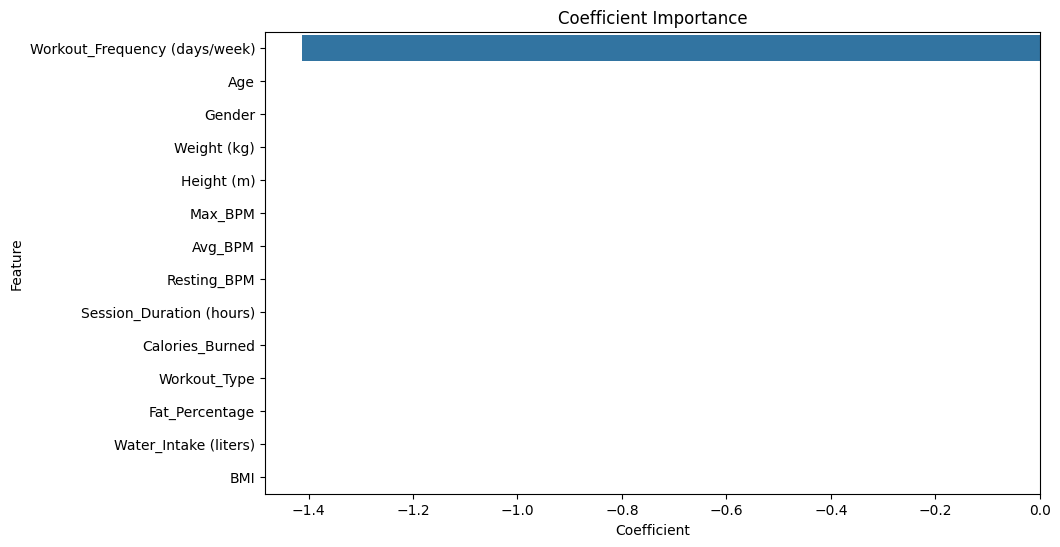

In [536]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Coefficient Importance')
plt.show()

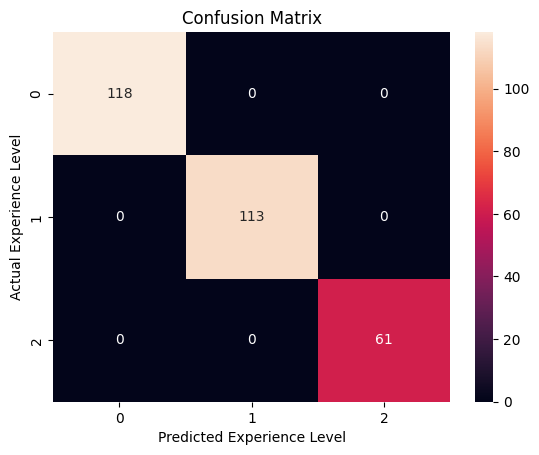

In [525]:
conf_matrix = confusion_matrix(y_test_2,y_pred_class_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket")
plt.xlabel('Predicted Experience Level')
plt.ylabel('Actual Experience Level')
plt.title('Confusion Matrix')
plt.show()

In [526]:
# @title K Nearet Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2, y_train_2)

y_pred_class = knn.predict(X_test_2)
KNN_acc = accuracy_score(y_test_2,y_pred_class)

conf_matrix = confusion_matrix(y_test_2,y_pred_class)
print(classification_report(y_pred_class, y_test_2))

# Prediction and evaluation
y_pred_test = knn.predict(X_test_2)
print(f'Model z : accuracy (test)= {accuracy_score(y_test_2, y_pred_test):.2f}')
# Predict on train dataset
y_pred_train = knn.predict(X_train_2)
print(f'Model : accuracy (train) = {accuracy_score(y_train_2, y_pred_train):.2f}')


              precision    recall  f1-score   support

           1       0.87      1.00      0.93       103
           2       1.00      0.88      0.94       128
           3       1.00      1.00      1.00        61

    accuracy                           0.95       292
   macro avg       0.96      0.96      0.96       292
weighted avg       0.96      0.95      0.95       292

Model z : accuracy (test)= 0.95
Model : accuracy (train) = 0.99


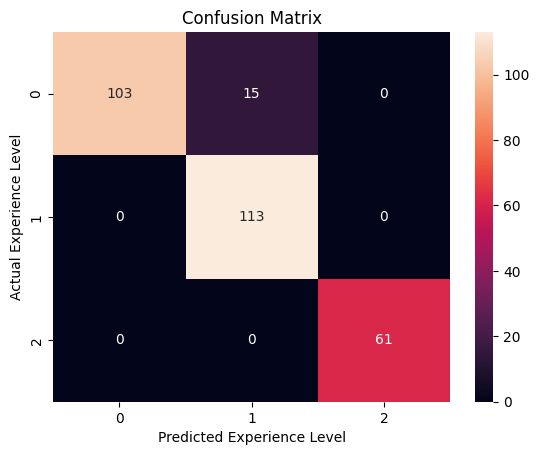

In [527]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket")
plt.xlabel('Predicted Experience Level')
plt.ylabel('Actual Experience Level')
plt.title('Confusion Matrix')
plt.show()

In [528]:
# @title Decision Tree Classifier
dectree = DecisionTreeClassifier(max_depth=5)
dectree.fit(X_train_2, y_train_2)

y_pred_class_2 = dectree.predict(X_test_2)
DecTree_acc = accuracy_score(y_test_2,y_pred_class_2)

conf_matrix = confusion_matrix(y_test_2,y_pred_class_2)
print(classification_report(y_pred_class_2, y_test_2))

# Prediction and evaluation
y_pred_test = dectree.predict(X_test_2)
print(f'Model z : accuracy (test)= {accuracy_score(y_test_2, y_pred_test):.2f}')
# Predict on train dataset
y_pred_train = dectree.predict(X_train_2)
print(f'Model : accuracy (train) = {accuracy_score(y_train_2, y_pred_train):.2f}')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        61

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Model z : accuracy (test)= 1.00
Model : accuracy (train) = 1.00


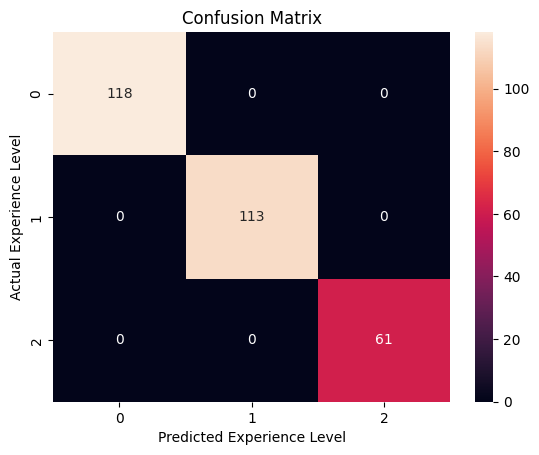

In [529]:

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket")
plt.xlabel('Predicted Experience Level')
plt.ylabel('Actual Experience Level')
plt.title('Confusion Matrix')
plt.show()

In [530]:
importances = dectree.feature_importances_
feature_names = X_2.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importances)

Feature importances:
                          Feature  Importance
12  Workout_Frequency (days/week)    0.583477
7        Session_Duration (hours)    0.416523
0                             Age    0.000000
1                          Gender    0.000000
2                     Weight (kg)    0.000000
3                      Height (m)    0.000000
4                         Max_BPM    0.000000
5                         Avg_BPM    0.000000
6                     Resting_BPM    0.000000
8                 Calories_Burned    0.000000
9                    Workout_Type    0.000000
10                 Fat_Percentage    0.000000
11          Water_Intake (liters)    0.000000
13                            BMI    0.000000


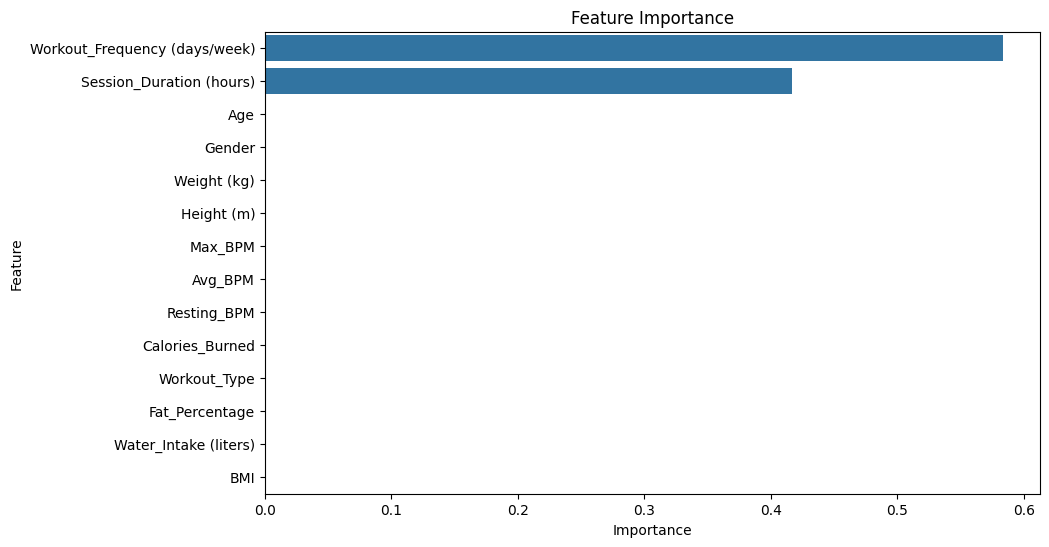

In [531]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()